In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the data
df = pd.read_csv('Iris_dataset.csv')  

In [3]:
def k_means_clustering(dataset, k=3, max_iterations=100):
    
    # Remove the last column (Species)
    species_column = dataset.iloc[:, -1]
    data = dataset.iloc[:, :-1].values
    
    # Initialize centroids randomly
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    
    for iteration in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of points assigned to each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(new_centroids == centroids):
            break
        
        centroids = new_centroids

    # Plot the cluster output
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
    plt.title('K-Means Clustering')
    plt.show()

    # Plot the actual species
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(data)

    species_colors = {
    0: 'red',    # Iris-setosa
    1: 'green',  # Iris-versicolor
    2: 'blue'    # Iris-virginica
    }
    
    # Map cluster labels to colors
    colors = [species_colors[label] for label in labels]

    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.5)
    plt.title('Actual Species')
    plt.show()

In [4]:
def principal_component_analysis(dataset):
    
    # Remove the last column (Species)
    species_column = dataset.iloc[:, -1]
    data = dataset.iloc[:, :-1].values
    
    # Standardize the data
    standardized_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)
    
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Project the data onto the first three eigenvectors
    projected_data = np.dot(standardized_data, eigenvectors[:, :3])

    # Display the eigenvalues
    print("Eigenvalues:\n", eigenvalues[:3])
    print("\nEigenvectors:\n", eigenvectors[:, :3])

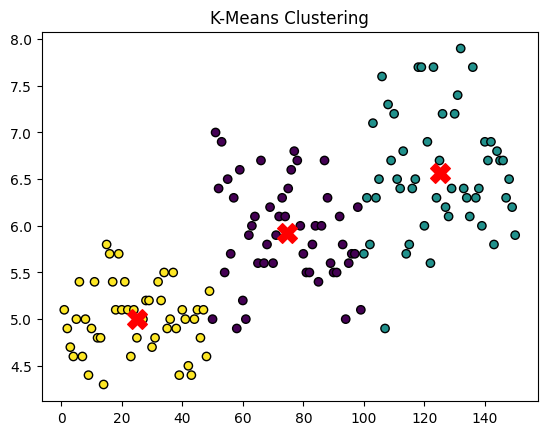

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


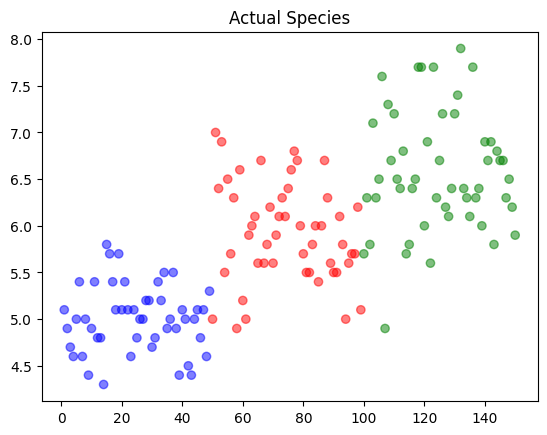

In [5]:
# Display the K-Means Clustering
k_means_clustering(df)

In [6]:
# Display the Principal Component Analysis
principal_component_analysis(df)

Eigenvalues:
 [3.7603354  0.92794917 0.23570257]

Eigenvectors:
 [[-0.48136016 -0.02275157 -0.67406853]
 [-0.44844975  0.38285827  0.64520569]
 [ 0.23195044  0.92007839 -0.27427786]
 [-0.51079205  0.03074857  0.13238322]
 [-0.5024696   0.07356757 -0.19127876]]
